<a href="https://colab.research.google.com/github/sladem-tox/PK_calcs/blob/main/ZeroOrderElimination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zero Order Elimination plasma-time curve.
`Page by Dr Slade Matthews, The University of Sydney, 2023`

Elimination can be described using an ordinary differential equation (ODE):

\begin{equation} dC/dt = \frac{V_m.C_p}{Km + C_p} \end{equation}

This behaviour is called Michaelis-Menten kinetics which was originally used to describe enzyme kinetics. The rate of enzymatic degradation of a substrate by an enzyme has some maximum, Vmax which along with Km (concentration at which rate = 1/2 Vmax) can be used to describe the dynamics of the enzyme reaction. Since enzymes and transporters important to drug disposition can be saturated the same formula can be useful in pharmacokinetics.

This situation could arise with drugs such as alcohol where at most 10 grams can be eliminated from the body per hour (at Vmax). Another estimate (See **Holford, 1987**) describes the Vmax as 8.5 g/h/70kg which equates to a plasma elimination rate of 230 mg/L/h.  The Km for alcohol is around 0.01 % (g/100mL) so we are halfway to Vmax at this concentration. For calculation purposes use the value 80 mg/L as the Km.

Some other drugs such as phenytoin also display saturated elimination kinetics (see Chapter 9: Non-linear Pharmacokinetics *in* **Pharmacokinetics Made Easy** by Donald Burkett).

*Holford, N., Clinical Pharmacokinetics of Ethanol. Clinical Pharmacokinetics, 1987. 13: p. 273-292.

In the cell below we require values for dose, C0, Vm, and Km.


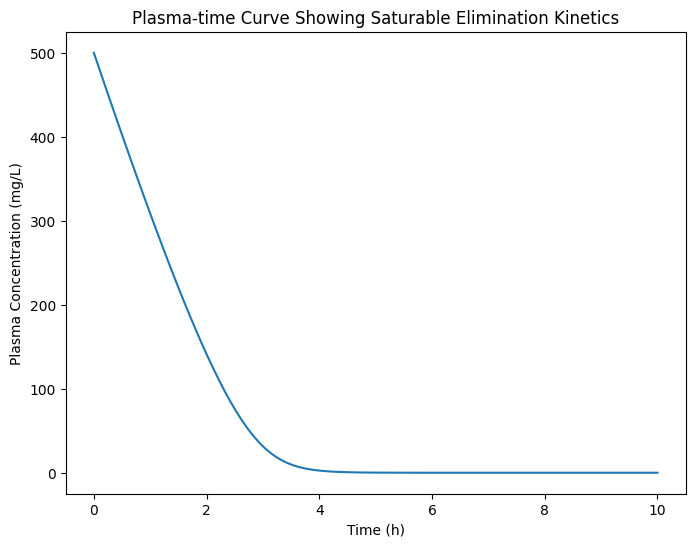

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the Michaelis-Menten equation based here on a saturable elimination pathway.
def decay_model(C, t, Vm, km):
    dCdt = -Vm * C / (km + C)
    return dCdt

# Initial conditions for IV dosing. Conc at t=0, Vmax and Km
C0 = 500  # Initial concentration (mg/L)
Vm = 230  # Maximum rate of decay (mg/L/h)
km = 80  # C value at which decay is half Vm (mg/L)

# Generate a series of timepoints with linspace.
t = np.linspace(0, 10, 100)  # Adjust the time range as needed

# Solve the ordinary differential equation (ODE) using scipy.
# The ODE does not have a simple solution and must be integrated to find y values at time t.
C = odeint(decay_model, C0, t, args=(Vm, km))

# Plot
plt.figure(figsize=(8, 6))
plt.plot(t, C)
plt.xlabel('Time (h)')
plt.ylabel('Plasma Concentration (mg/L)')
plt.title('Plasma-time Curve Showing Saturable Elimination Kinetics')
plt.show()
